# Machine Learning - Precios Propiedades (Versión 1)

In [ ]:
import pandas as pd

import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## 0. Lectura de datos

In [ ]:
DIR = "/content/drive/MyDrive/DATA MINING/fcen-dm-2025-prediccion-precio-de-propiedades/entrenamiento"

In [ ]:
df_ent = pd.read_csv(f"{DIR}/entrenamiento.csv", index_col="id")
df_ent.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
id,,,,,,,,,,,,,,,,,,,,,
556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,NaN,...,2.0,NaN,NaN,USD,NaN,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0
257134,Propiedad,2019-08-17,9999-12-31,2019-08-17,-58.420737,-34.631770,Argentina,Capital Federal,Boedo,NaN,...,1.0,74.0,47.0,USD,NaN,PH Venta Boedo 2 amb Patio,Corredor Responsable: MARCELO TRUJILLO - CPI ...,PH,Venta,140000.0
521738,Propiedad,2019-08-05,2019-08-31,2019-08-05,-58.429983,-34.607225,Argentina,Capital Federal,Almagro,NaN,...,1.0,66.0,64.0,USD,NaN,Venta 3 Ambientes - Almagro - Balcón - Ameniti...,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta,173000.0
383947,Propiedad,2019-10-23,2019-11-08,2019-10-23,-58.420780,-34.608640,Argentina,Capital Federal,Almagro,NaN,...,1.0,55.0,55.0,USD,NaN,Depto.tipo casa de 3 ambientes en Venta en Alm...,"Muy Lindo ph al contrafrente con 2 patios!, 80...",PH,Venta,155000.0
986212,Propiedad,2019-08-01,2019-08-14,2019-08-01,-58.371394,-34.621835,Argentina,Capital Federal,San Telmo,NaN,...,1.0,42.0,42.0,USD,NaN,Ph en edificio de estilo Frances . 2 dormitori...,PH en Edificio Frances en Estado original!!!al...,PH,Venta,74000.0


In [ ]:
# cantidad de filas y columnas
df_ent.shape

(985180, 24)

## 1. Entender los datos (AID)

In [ ]:
df_ent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985180 entries, 556713 to 1000000
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ad_type          985180 non-null  object 
 1   start_date       985180 non-null  object 
 2   end_date         985180 non-null  object 
 3   created_on       985180 non-null  object 
 4   lat              832453 non-null  float64
 5   lon              833388 non-null  float64
 6   l1               985180 non-null  object 
 7   l2               985180 non-null  object 
 8   l3               927733 non-null  object 
 9   l4               225006 non-null  object 
 10  l5               4711 non-null    object 
 11  l6               0 non-null       float64
 12  rooms            496527 non-null  float64
 13  bedrooms         386021 non-null  float64
 14  bathrooms        766218 non-null  float64
 15  surface_total    441184 non-null  float64
 16  surface_covered  430023 non-null  flo

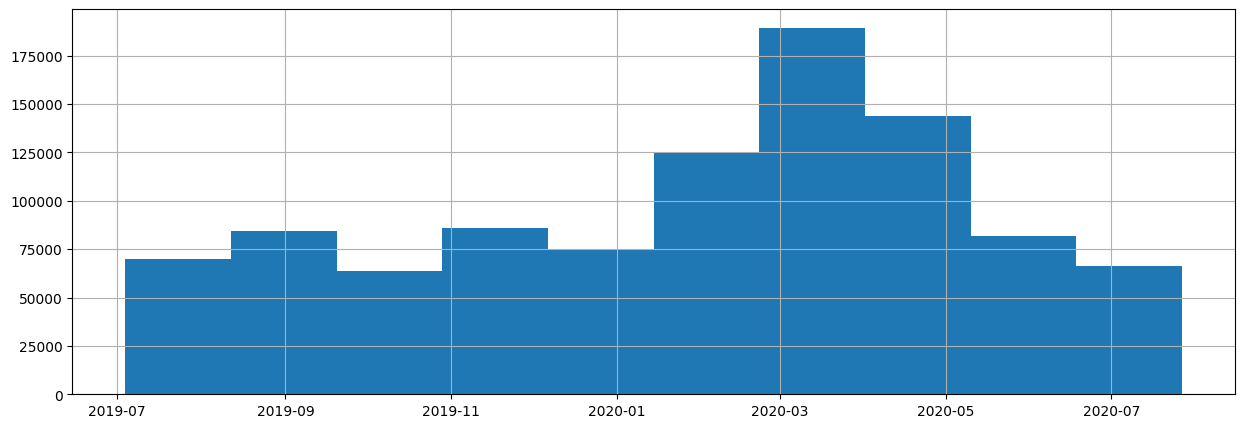

In [ ]:
df_ent["start_date"] = pd.to_datetime(df_ent["start_date"])
df_ent["start_date"].hist(figsize=(15,5),bins=10);

<Axes: >

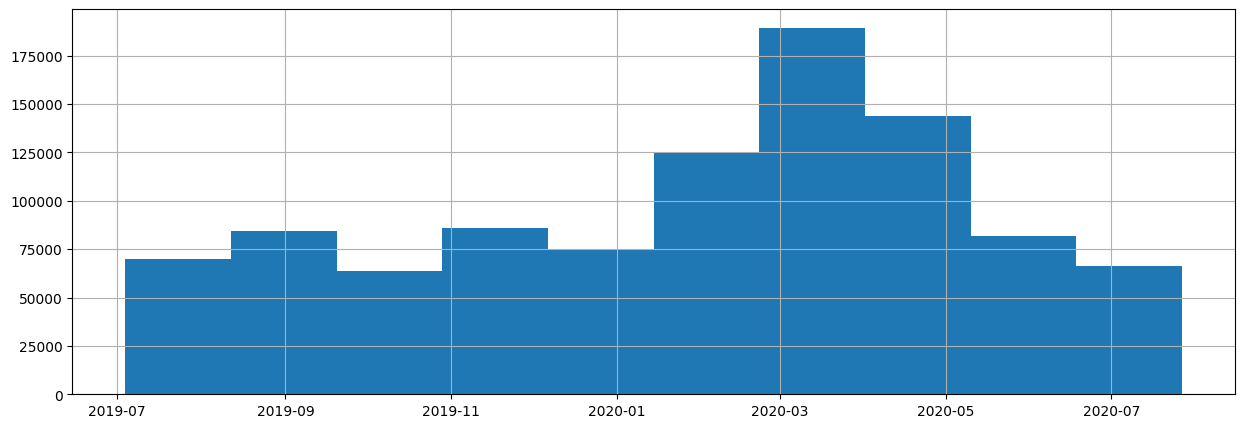

In [ ]:
df_ent["created_on"] = pd.to_datetime(df_ent["created_on"])
df_ent["created_on"].hist(figsize=(15,5),bins=10)

<Axes: xlabel='l1'>

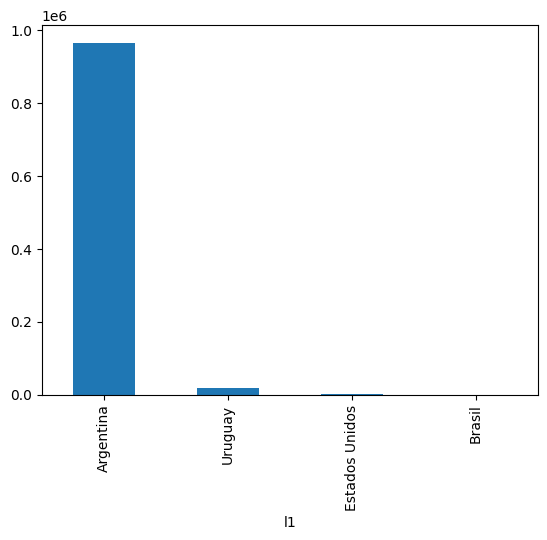

In [ ]:
df_ent["l1"].value_counts().plot(kind="bar")

<Axes: xlabel='l2'>

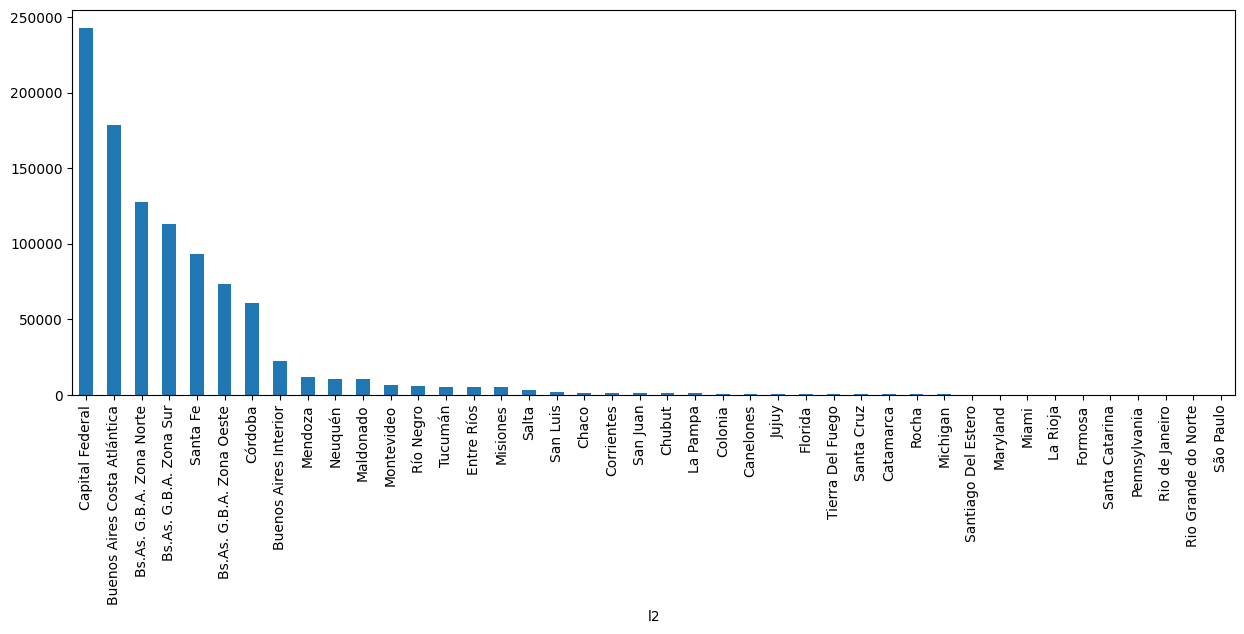

In [ ]:
df_ent["l2"].value_counts().plot(kind="bar",figsize=(15,5))

In [ ]:
df_ent["l2"].value_counts()

,count
l2,
Capital Federal,242726
Buenos Aires Costa Atlántica,178712
Bs.As. G.B.A. Zona Norte,127510
Bs.As. G.B.A. Zona Sur,112975
Santa Fe,93111
Bs.As. G.B.A. Zona Oeste,73172
Córdoba,60877
Buenos Aires Interior,22280
Mendoza,11558


In [ ]:
df_ent["l4"].value_counts()

,count
l4,
Nordelta,17310
La Plata,8333
Castelar,6951
Ramos Mejía,5861
Adrogué,4693
...,...
Los Troncos Country Club,1
Lozano,1
Barrio Parque Las Acacias,1


<Axes: xlabel='l5'>

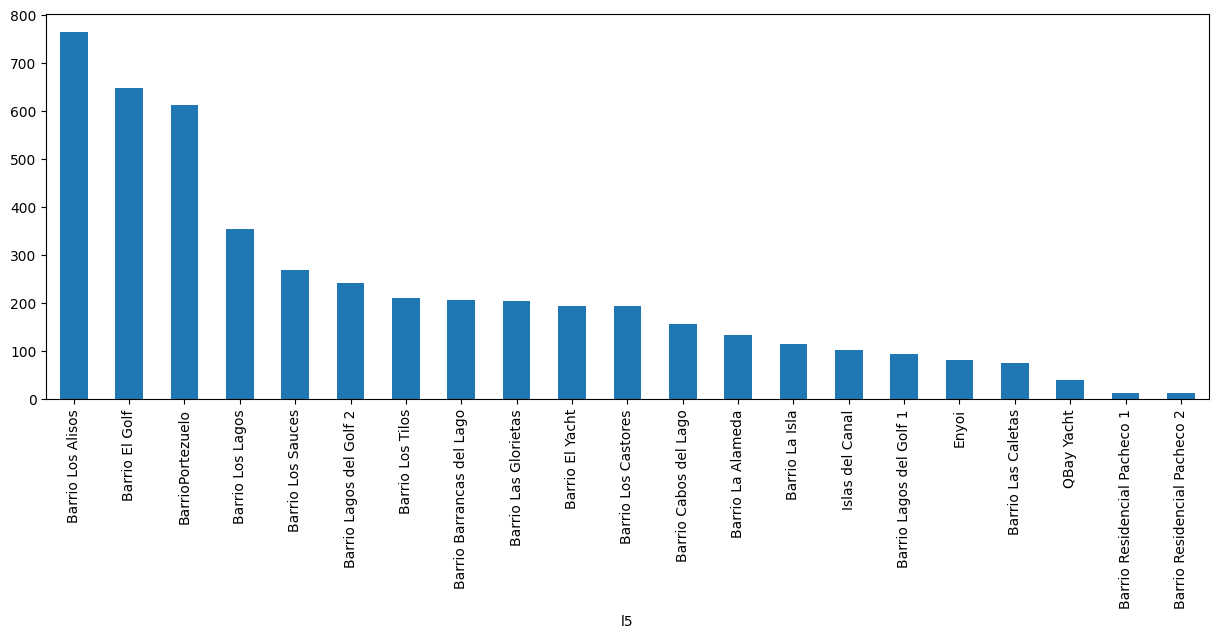

In [ ]:
df_ent["l5"].value_counts().plot(kind="bar",figsize=(15,5))

<Axes: xlabel='rooms'>

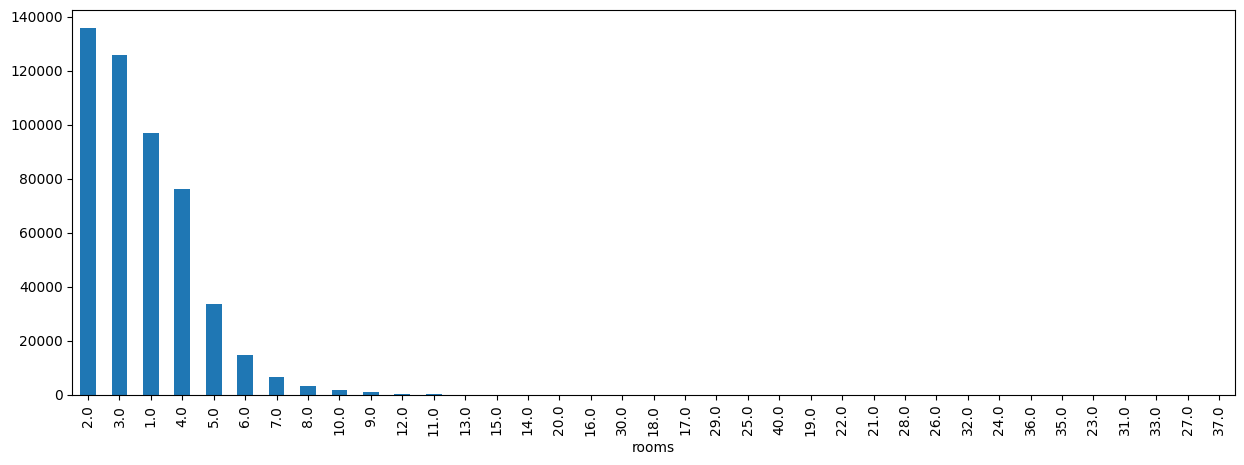

In [ ]:
df_ent["rooms"].value_counts().plot(kind="bar",figsize=(15,5))

<Axes: xlabel='bedrooms'>

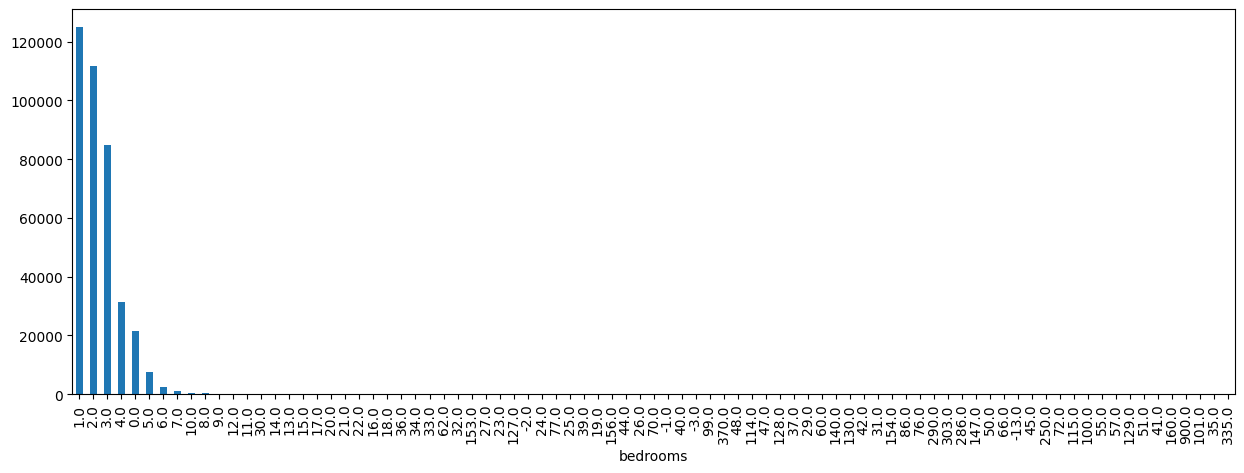

In [ ]:
df_ent["bedrooms"].value_counts().plot(kind="bar",figsize=(15,5))

<Axes: xlabel='bathrooms'>

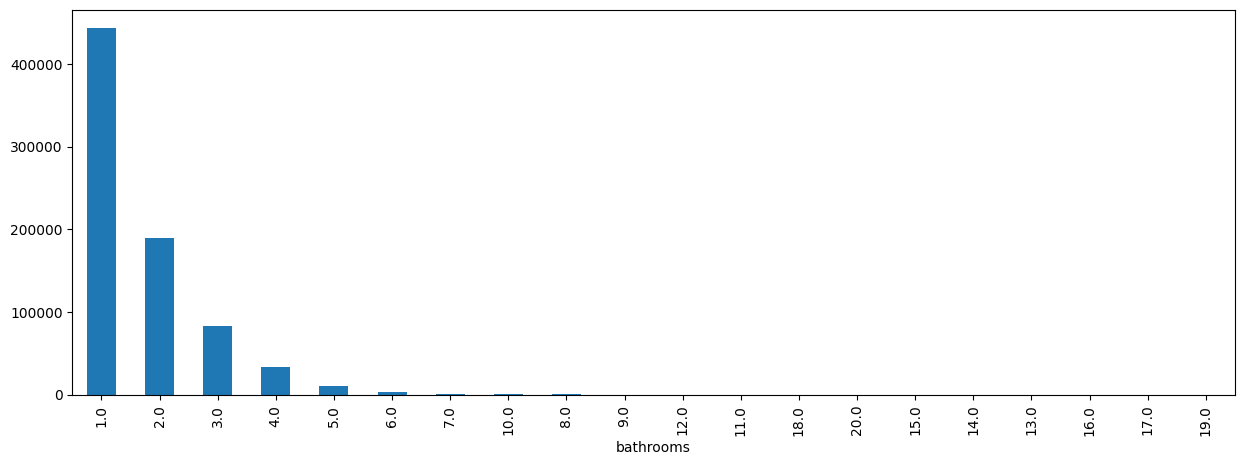

In [ ]:
df_ent["bathrooms"].value_counts().plot(kind="bar",figsize=(15,5))

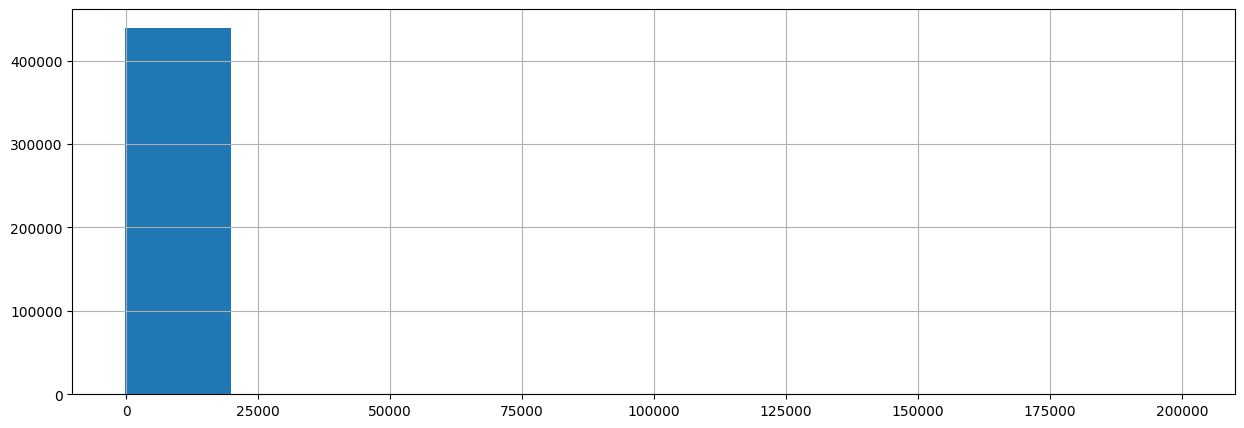

In [ ]:
df_ent["surface_total"].hist(figsize=(15,5));

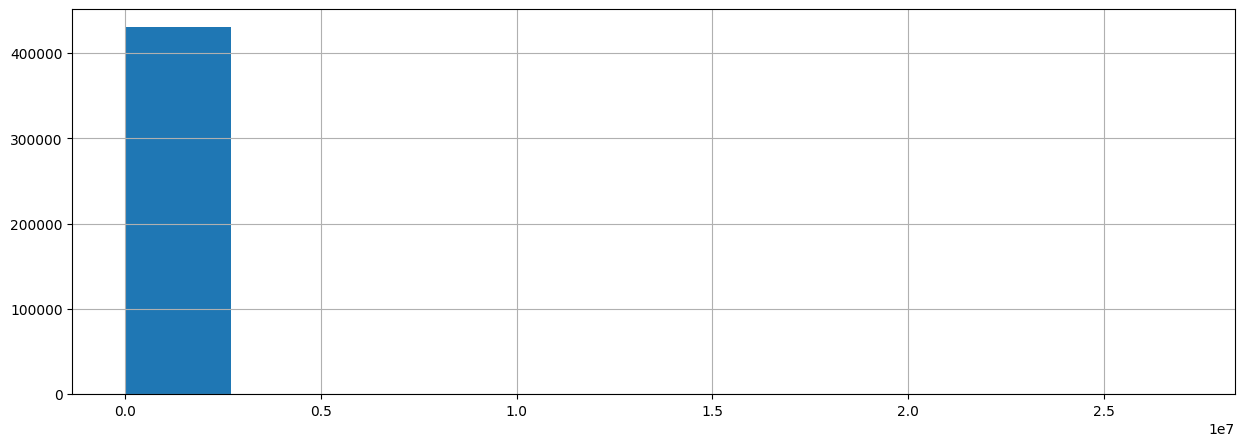

In [ ]:
df_ent["surface_covered"].hist(figsize=(15,5));

<Axes: xlabel='currency'>

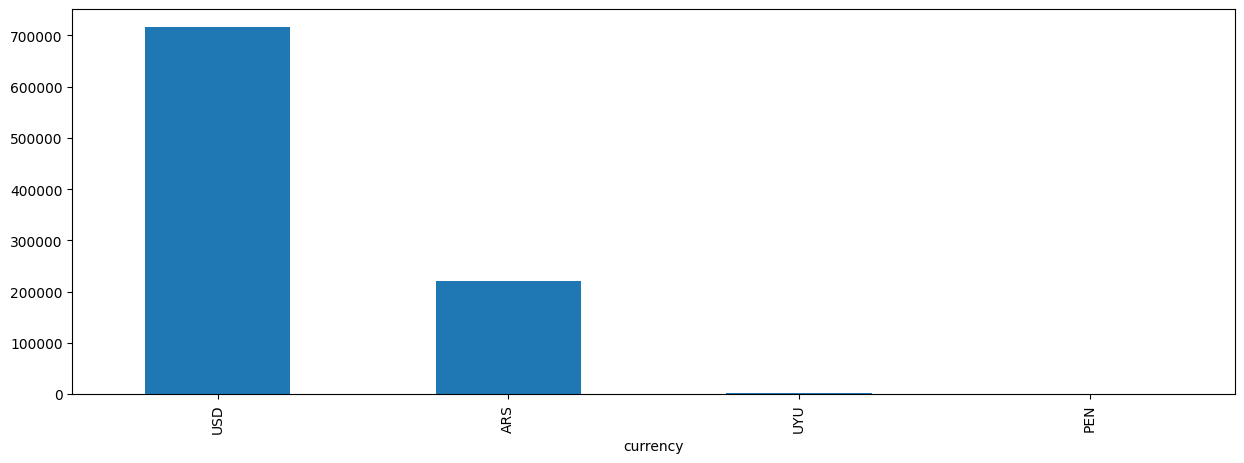

In [ ]:
df_ent["currency"].value_counts().plot(kind="bar",figsize=(15,5))

<Axes: xlabel='price_period'>

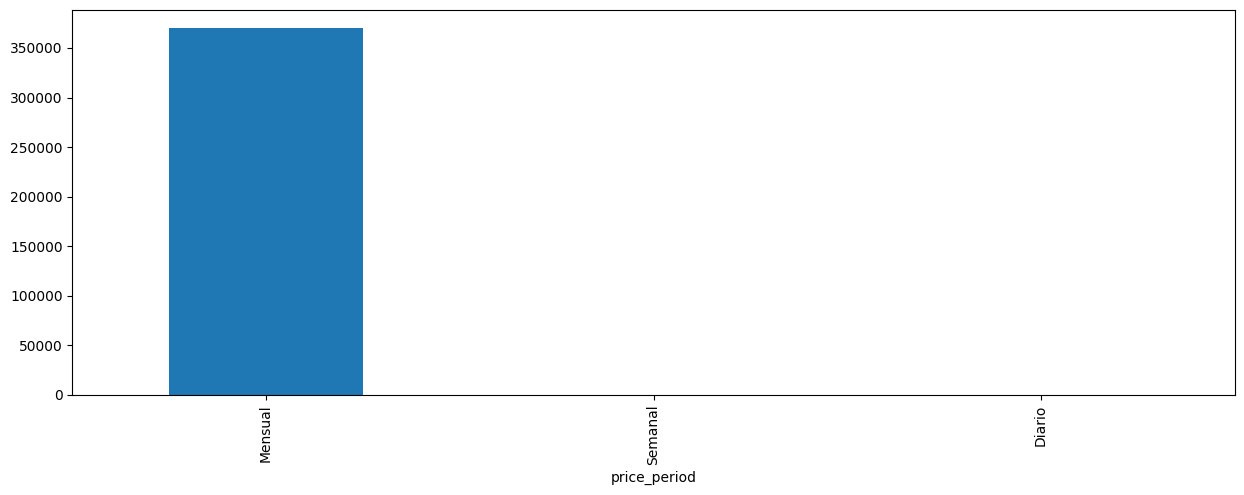

In [ ]:
df_ent["price_period"].value_counts().plot(kind="bar",figsize=(15,5))

In [ ]:
df_ent["title"].value_counts()

,count
title,
"Departamento en Venta en Lomas de zamora oeste, lomas de zamora",2474
Departamento - Centro,1709
Departamento en Venta,1697
Departamento de 2 ambientes en Venta en Villa crespo,1693
"Casa en Venta en Adrogue, almirante brown",1632
...,...
A TERMINAR ( SISTEMA STELL FRAMING ),1
VENDO CASA EN CANDELARIA A TERMINAR CON AMPLIOS LOCALES COMERCIALES,1
VENDO MANSIÓN VILLA SARITA ( Ref.#319180) LVR,1


<Axes: xlabel='operation_type'>

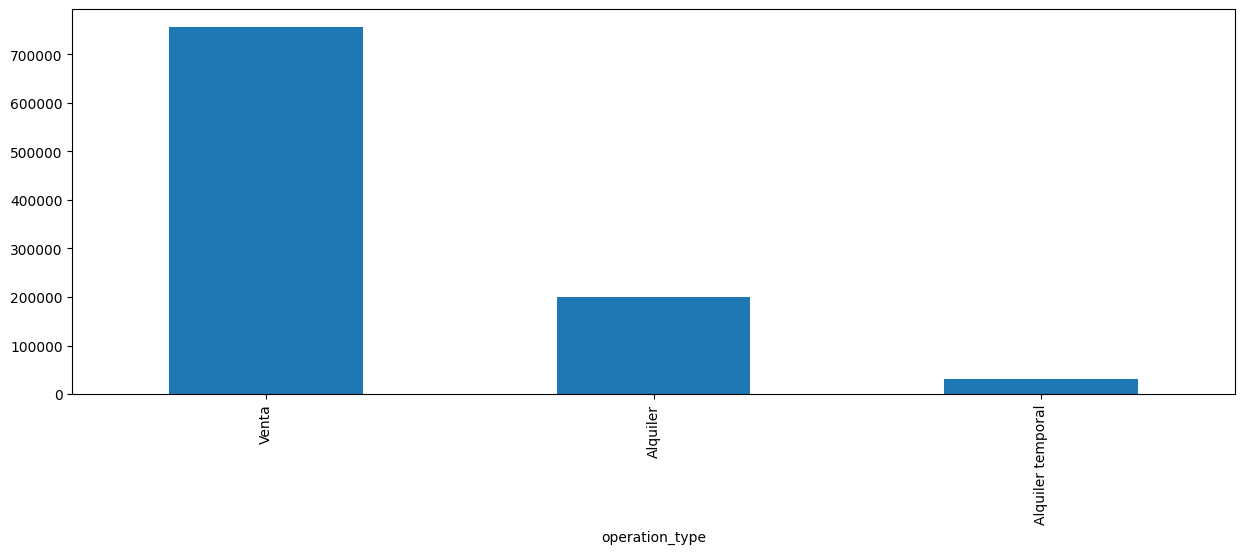

In [ ]:
df_ent["operation_type"].value_counts().plot(kind="bar",figsize=(15,5))

<Axes: xlabel='operation_type'>

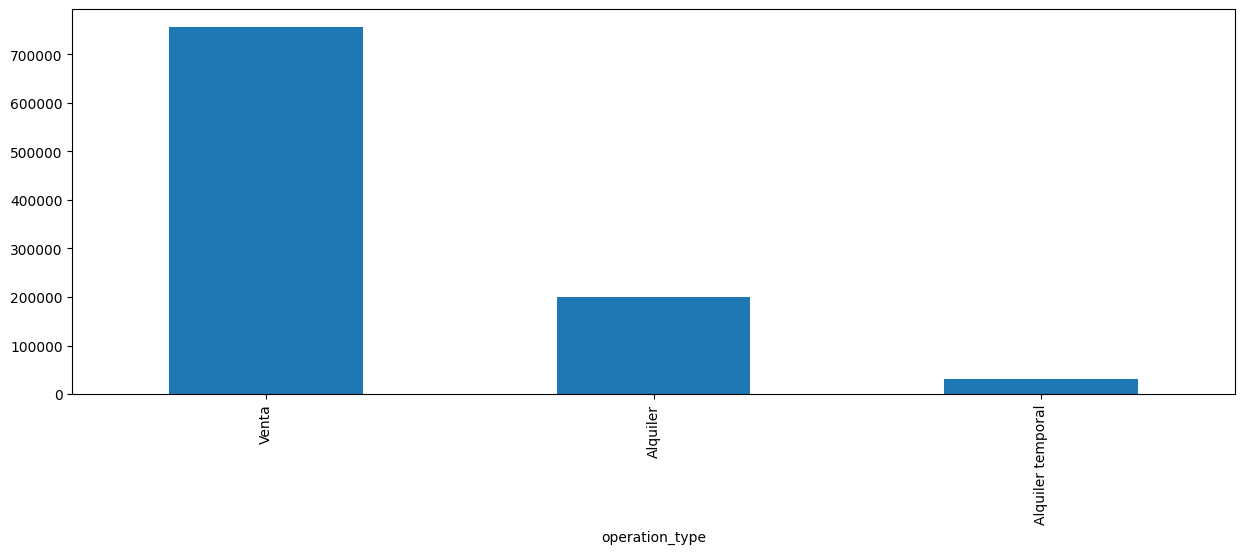

In [ ]:
df_ent["operation_type"].value_counts().plot(kind="bar",figsize=(15,5))

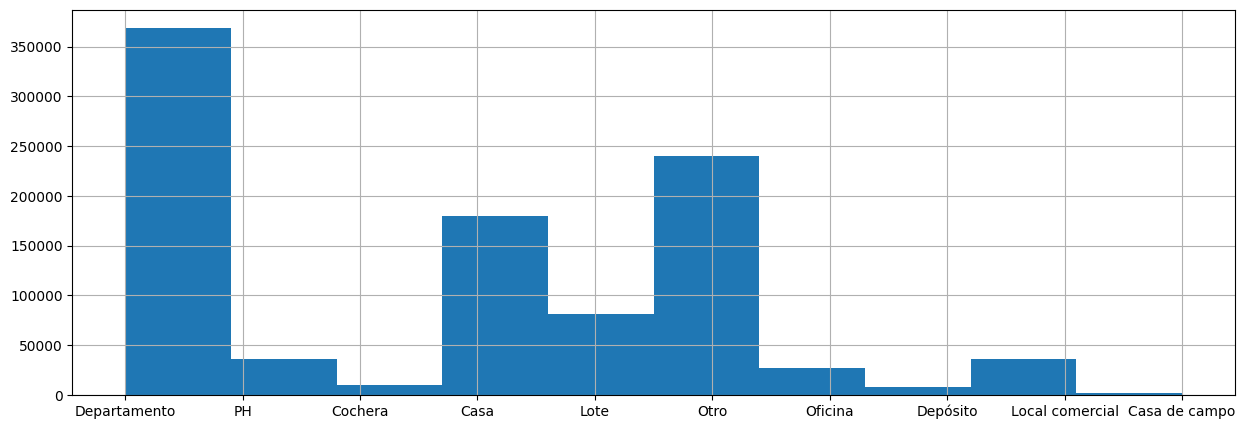

In [ ]:
df_ent["property_type"].hist(figsize=(15,5));

<Axes: >

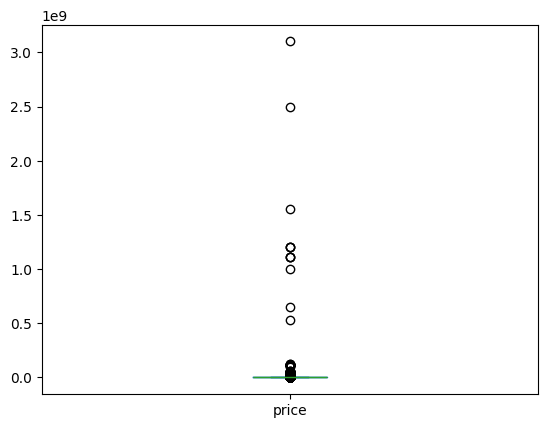

In [ ]:
df_ent['price'].plot.box()


<Axes: >

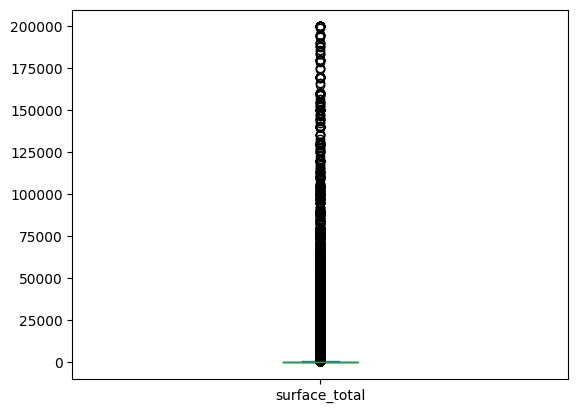

In [ ]:
df_ent['surface_total'].plot.box()


<Axes: >

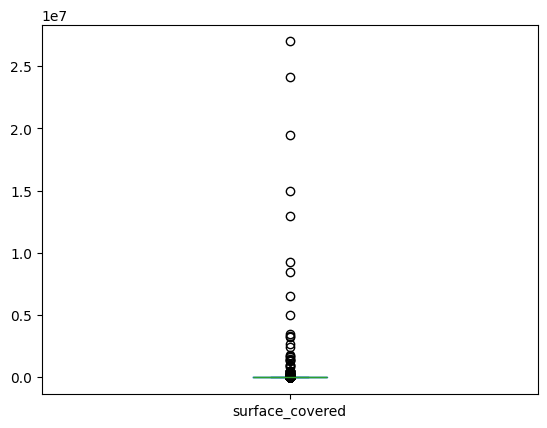

In [ ]:
df_ent['surface_covered'].plot.box()


In [ ]:
q1_price = df_ent["price"].quantile(0.01)
q99_price = df_ent["price"].quantile(0.99)

q1_surf_total = df_ent["surface_total"].quantile(0.01)
q99_surf_total = df_ent["surface_total"].quantile(0.99)

q1_surf_cov = df_ent["surface_covered"].quantile(0.01)
q99_surf_cov = df_ent["surface_covered"].quantile(0.99)

## 2. Limpiar y transformar los datos (MD)



In [ ]:
df_ent = df_ent.loc[
    (df_ent["price"] >= q1_price) & (df_ent["price"] <= q99_price) & (df_ent["surface_total"] >= q1_surf_total) & (df_ent["surface_total"] <= q99_surf_total) & (df_ent["surface_covered"] >= q1_surf_cov) & (df_ent["surface_covered"] <= q99_surf_cov) & (df_ent["l1"] == "Argentina") & (df_ent["currency"] == "USD") &(df_ent["operation_type"] == "Venta") & (df_ent["property_type"].isin(["Casa", "Departamento"])) &(df_ent["l2"] == "Capital Federal")
].drop(["ad_type", "l6", "title", "description", "start_date", "end_date", "created_on","currency", "price_period", "operation_type", "l1", "l2", "l5", "l4"], axis=1)
df_ent.shape

(71733, 10)

In [ ]:
df_ent.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,price
id,,,,,,,,,,
521738,-58.429983,-34.607225,Almagro,3.0,2.0,1.0,66.0,64.0,Departamento,173000.0
499733,-58.404054,-34.599623,Barrio Norte,3.0,NaN,2.0,91.0,86.0,Departamento,190000.0
473866,-58.421650,-34.588602,Palermo,3.0,2.0,2.0,80.0,80.0,Departamento,240000.0
155953,-58.378095,-34.608478,Monserrat,2.0,1.0,1.0,48.0,43.0,Departamento,99000.0
836819,-58.420295,-34.606271,Almagro,3.0,2.0,2.0,80.0,76.0,Departamento,190000.0


In [ ]:
df_ent["proporcion_terreno_cubierto"] = df_ent["surface_covered"] / df_ent["surface_total"]
df_ent["diferencia_superficie"] = df_ent["surface_total"] - df_ent["surface_covered"]

In [ ]:
barrios_l3 = {barrio: i for i, barrio in enumerate(sorted(df_ent["l3"].dropna().unique()))}
df_ent["l3_codificado"] = df_ent["l3"].map(barrios_l3)

In [ ]:
propiedades = {tipo: i for i, tipo in enumerate(sorted(df_ent["property_type"].dropna().unique()))}
df_ent["property_type_codificado"] = df_ent["property_type"].map(propiedades).fillna(-1)
df_ent = df_ent.drop(columns=["property_type"])


In [ ]:
df_ent.loc[df_ent['surface_covered'] > df_ent['surface_total'] * 1.5, 'surface_covered'] = df_ent['surface_total']

df_ent['lat'] = df_ent['lat'].mask(df_ent['lat'] == 0, df_ent['lat'].mean())
df_ent['lon'] = df_ent['lon'].mask(df_ent['lon'] == 0, df_ent['lon'].mean())

medianas_rooms_por_propiedad = df_ent.groupby('property_type_codificado')['rooms'].median()
df_ent.loc[df_ent['rooms'] == 0, 'rooms'] = df_ent.loc[df_ent['rooms'] == 0, 'property_type_codificado'].map(medianas_rooms_por_propiedad)

df_ent.loc[df_ent['bathrooms'] > df_ent['rooms'], 'bathrooms'] = df_ent['rooms']


In [ ]:
df_ent['precio_m2'] = df_ent['price'] / df_ent['surface_total']
precio_m2_por_barrio = df_ent.groupby('l3')['precio_m2'].mean()
df_ent['precio_m2_por_barrio'] = df_ent['l3'].map(precio_m2_por_barrio)
df_ent = df_ent.drop(columns="precio_m2")


In [ ]:
df_ent.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,proporcion_terreno_cubierto,diferencia_superficie,l3_codificado,property_type_codificado,precio_m2_por_barrio
id,,,,,,,,,,,,,,
521738,-58.429983,-34.607225,Almagro,3.0,2.0,1.0,66.0,64.0,173000.0,0.969697,2.0,2.0,1,2498.470582
499733,-58.404054,-34.599623,Barrio Norte,3.0,NaN,2.0,91.0,86.0,190000.0,0.945055,5.0,5.0,1,3098.989918
473866,-58.421650,-34.588602,Palermo,3.0,2.0,2.0,80.0,80.0,240000.0,1.000000,0.0,27.0,1,3533.841119
155953,-58.378095,-34.608478,Monserrat,2.0,1.0,1.0,48.0,43.0,99000.0,0.895833,5.0,23.0,1,2058.965807
836819,-58.420295,-34.606271,Almagro,3.0,2.0,2.0,80.0,76.0,190000.0,0.950000,4.0,2.0,1,2498.470582


In [ ]:
df_ent = df_ent.fillna(0)

## 3. Entrenamiento del modelos (AA)

In [ ]:
df_ent = df_ent.select_dtypes('number')

X = df_ent[df_ent.columns.drop('price')]
y = df_ent['price']

In [ ]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Definimos el valor de los hiperparámetros a usar por el modelo
n_estimators = 500
max_depth = 30

reg = sk.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1, random_state=42)

# Entrenamos el modelo
_ = reg.fit(X_train, y_train)

# Cálculo del error en entrenamiento (train)
y_pred = reg.predict(X_train)
score_train = sk.metrics.root_mean_squared_error(y_train, y_pred)

# Cálculo del error en prueba (test)
y_pred = reg.predict(X_test)
score_test  = sk.metrics.root_mean_squared_error(y_test,  y_pred)

print(f"{n_estimators=} -- {max_depth=} --> {score_train=:.2f} - {score_test=:.2f}")

n_estimators=500 -- max_depth=30 --> score_train=38156.46 - score_test=84735.03


## 4. Dataframe A Predecir


In [ ]:
df_ap = pd.read_csv(f"/content/drive/MyDrive/DATA MINING/fcen-dm-2025-prediccion-precio-de-propiedades/a_predecir.csv", index_col="id")
df_ap.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
id,,,,,,,,,,,,,,,,,,,,,
1068,Propiedad,2020-06-21,2020-06-27,2020-06-21,NaN,NaN,Argentina,Capital Federal,Palermo,Palermo Viejo,...,1.0,286.0,160.0,USD,NaN,Casa de 4 ambientes en Venta en Palermo viejo,TRIPLEX EN MEDIO TERRENO DE 4 AMB MUY AMPLIOS...,Casa,Venta,NaN
1069,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.426576,-34.590987,Argentina,Capital Federal,Palermo,NaN,...,5.0,444.0,270.0,USD,NaN,Casa de 8 ambientes en Venta en Palermo,OPORTUNIDAD!! Edificio en Block desarrollado e...,Casa,Venta,NaN
1073,Propiedad,2020-06-21,2020-06-24,2020-06-21,-58.479808,-34.631266,Argentina,Capital Federal,Floresta,NaN,...,2.0,166.0,120.0,USD,NaN,Venta de casa en PH en Floresta,Casa con muy buena distribución y de amplios a...,Casa,Venta,NaN
1082,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.437889,-34.603291,Argentina,Capital Federal,Villa Crespo,NaN,...,3.0,352.0,185.0,USD,NaN,Casa de 5 ambientes en Venta en Villa crespo,SON 185 METROS CUBIERNTOS CON COCHERA MAS PATI...,Casa,Venta,NaN
1091,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.476461,-34.602494,Argentina,Capital Federal,Villa del Parque,NaN,...,2.0,168.0,106.0,USD,NaN,Venta de casa de tres ambientes en Villa del P...,"Hermosa casa ubicada en zona residencial, sobr...",Casa,Venta,NaN


In [ ]:
df_ap.shape

(7012, 24)

In [ ]:
df_ap = df_ap.drop(columns=["ad_type", "l6", "title", "description", "start_date", "end_date", "created_on", "currency", "price_period", "operation_type","l1","l5","l2","l4"])

In [ ]:
df_ap["proporcion_terreno_cubierto"] = df_ap["surface_covered"] / df_ap["surface_total"]
df_ap["diferencia_superficie"] = df_ap["surface_total"] - df_ap["surface_covered"]

In [ ]:
df_ap["l3_codificado"] = df_ap["l3"].map(barrios_l3).fillna(-1)

In [ ]:
df_ap["property_type_codificado"] = df_ap["property_type"].map(propiedades).fillna(-1)
df_ap = df_ap.drop(columns=["property_type"])


In [ ]:
df_ap['precio_m2_por_barrio'] = df_ap['l3'].map(precio_m2_por_barrio)

In [ ]:
X = df_ent[df_ent.columns.drop('price')]
y = df_ent['price']

# Entrenamos el modelo con todos los datos de entrenamiento.csv
reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, n_estimators=500, n_jobs=-1,
                      random_state=42)

In [ ]:
# Hacemos en df_ap la misma limpieza que en df_ent
df_ap.loc[df_ap['surface_covered'] > df_ap['surface_total'] * 1.5, 'surface_covered'] = df_ap['surface_total']

df_ap['lat'] = df_ap['lat'].mask(df_ap['lat'] == 0, df_ap['lat'].mean())
df_ap['lon'] = df_ap['lon'].mask(df_ap['lon'] == 0, df_ap['lon'].mean())

medianas_rooms_por_propiedad = df_ap.groupby('property_type_codificado')['rooms'].median()
df_ap.loc[df_ap['rooms'] == 0, 'rooms'] = df_ap.loc[df_ap['rooms'] == 0, 'property_type_codificado'].map(medianas_rooms_por_propiedad)


df_ap.loc[df_ap['bathrooms'] > df_ap['rooms'], 'bathrooms'] = df_ap['rooms']


df_ap = df_ap.fillna(0)

df_ap = df_ap.select_dtypes('number')

X_ap = df_ap[X.columns]

# Predecimos los precios del dataset a predecir
y_pred_ap = reg.predict(X_ap)
y_pred_ap

array([477294.57211501, 790025.92521557, 234926.8232967 , ...,
       825110.        , 200721.87442662, 249000.        ])